<a href="https://colab.research.google.com/github/MaschinenNah/MachineLearningKochbuch01/blob/main/02_FarbkanaeleHinzufuegenEntfernen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Farbkanäle hinzufügen und entfernen

Dieses Notebook zeigt, wie ihr mit Farbkanälen umgeht.

## Hilfsfunktionen

Wir benötigen die im Rezept [Datei laden und in Numpy Array umwandeln](https://colab.research.google.com/drive/1LxkCuKdVr21ah1U8GeFkary7PVftwBes?usp=sharing) gezeigte Formatierung, in eine Funktion verpackt:

In [ ]:
from PIL import Image
import numpy as np

def img_path_to_formated_array(path):
  img = Image.open(path)
  img_as_array = np.array(img)
  return (img_as_array / 255.0).astype("float32")

## Bilddatei bereitstellen und in NumPy Arrays laden:
Wir brauchen wiederum Beispieldateien. Nach der Ausführung der nächsten Zelle befindet sich eine Bilddatei `computer.jpg` und `factory.jpg` im Dateibereich dieses Notebooks:

In [ ]:
import urllib.request

link1 = "https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/Science_museum_025_adjusted.jpg/800px-Science_museum_025_adjusted.jpg"
link2 = "https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/Osram_Factory_1931.jpg/800px-Osram_Factory_1931.jpg"

urllib.request.urlretrieve(link1, "computer.jpg");
urllib.request.urlretrieve(link2, "factory.jpg");

Wir laden die beiden Bilder:

In [ ]:
fabrik = img_path_to_formated_array("factory.jpg")
computer = img_path_to_formated_array("computer.jpg")

`fabrik` ist schwarzweiß, `computer` in farbe


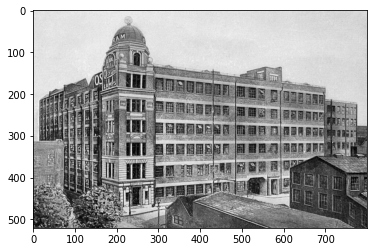

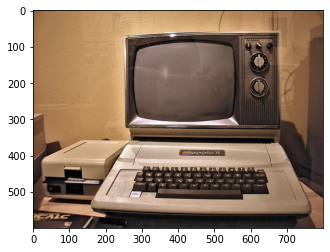

In [ ]:
from matplotlib import pyplot as plt

plt.imshow(fabrik, cmap="gray")
plt.show()
plt.imshow(computer)
plt.show()

## Farbkanal hinzufügen



`fabrik` enthält keine Farbkanäle, weil es ein schwarzweiß-Bild ist:

In [ ]:
fabrik.shape

(521, 800)

Für manche Typen von neuronalen Netzen (= Faltungsnetze) benötigen wir einen Farbkanal. Den können wir etwa per `reshape()` hinzufügen:

In [ ]:
fabrik_with_color_channel = fabrik.reshape(521, 800, 1)
fabrik_with_color_channel.shape

(521, 800, 1)

Dieser Code führt zum identischen Ergebnis:

In [ ]:
fabrik_with_color_channel = fabrik[..., np.newaxis]
fabrik_with_color_channel.shape

(521, 800, 1)

Dieser auch:

In [ ]:
fabrik_with_color_channel = fabrik[..., None]
fabrik_with_color_channel.shape

(521, 800, 1)

## In schwarzweiß umwandeln

Das folgende Beispiel wandelt das farbige Bild vom Computer in ein Graustufenbild um. Die Funktion `np.dot()` erledigt den Trick. Es multipliziert im gegenen Beispiel für jedes Pixel jeden Farbwert mit 0.33 und bildet die jeweilige Summe.

shape: (600, 800)


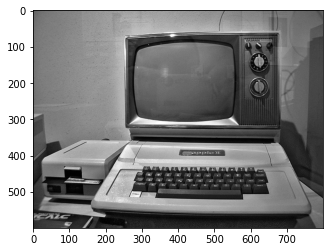

In [ ]:
computer_gray = np.dot(computer, [0.33, 0.33, 0.33])
print("shape:", computer_gray.shape)
plt.imshow(computer_gray, cmap="gray")

## Graustufen in RGB umwandeln

In vielen Situationen hat man ein Graustufenbild in Form eines NumPy-Array mit der shape `(hoehe, breite, 1)` oder `(hoehe, breite)` – Benötigt aber `(hoehe, breite, 3)`. Die Umwandlung können wir mit `np.stack()` erledigen:

In [ ]:
print("shape vorher", computer_gray.shape)
mit_drei_kanaelen = np.stack((computer_gray,)*3, axis=-1)
print("shape nachher", mit_drei_kanaelen.shape)

shape vorher (600, 800)
shape nachher (600, 800, 3)
